We have copied our Kim tweet data from csv into a postgres db called `kimtweets` which we'll now try to connect to using `pyscopg2` and `sqlalchemy` and display everything with `pandas`/`matplotlib`.

<a href="http://www.postgresqltutorial.com/import-csv-file-into-posgresql-table/">Tutorial for copying csv to postgres</a>

In [8]:
import psycopg2
import sqlalchemy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sqlalchemy import create_engine

In [2]:
# registering datetime converters
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Postgres credentials
POSTGRES_ADDRESS = 'localhost' 
POSTGRES_PORT = '5432' 
POSTGRES_USERNAME = 'karolin' 
POSTGRES_PASSWORD = '' 
POSTGRES_DBNAME = 'kimtweets'  

# long string containing Postgres login information
postgres_str = f'postgresql://{POSTGRES_USERNAME}:\
    {POSTGRES_PASSWORD}@{POSTGRES_ADDRESS}:\
        {POSTGRES_PORT}/{POSTGRES_DBNAME}'

# Creating the connection 
conn = create_engine(postgres_str)

In [4]:
pd.read_sql_query('''
    SELECT date, retweets, favorites, text 
    FROM kim_tweets 
    LIMIT 5;''', conn)

,date,retweets,favorites,text
0,2019-10-21 04:54:46,486,6438,awww I love this!!!https://twitter.com/PhotosO...
1,2019-10-21 04:51:01,1181,27097,thank you so much!!!https://twitter.com/KimKLe...
2,2019-10-21 02:07:02,55,1395,https://twitter.com/kardashstormy/status/11861...
3,2019-10-21 02:05:09,78,1818,https://twitter.com/krisjenner/status/11860991...
4,2019-10-21 02:04:26,39,865,https://twitter.com/kimkdelrey/status/11861001...


In [5]:
# selecting a cute style for our plots
print(plt.style.available)
plt.style.use('bmh')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


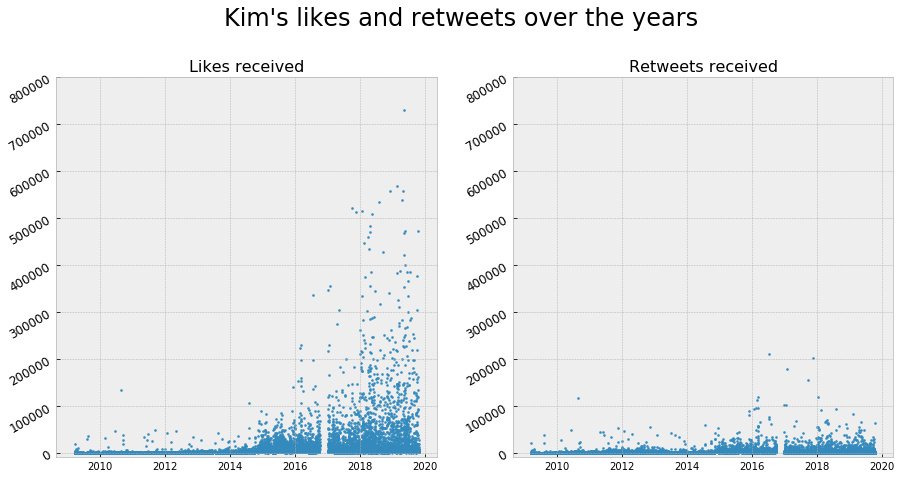

In [16]:
dates = pd.read_sql_query('''SELECT date FROM kim_tweets;''', conn)
# converting timestamps to plottable datetime object
dates = dates['date'].dt.date 

favorites = pd.read_sql_query('''SELECT favorites FROM kim_tweets;''', conn)
retweets = pd.read_sql_query('''SELECT retweets FROM kim_tweets;''', conn)

fig = plt.figure(figsize=(15,7))
fig.suptitle("Kim's likes and retweets over the years", fontsize=24, y=1.02)

y_ticks = np.arange(0,900000,100000)
ylims = (-10000, 800000)

ax = fig.add_subplot(121)
ax.set_title("Likes received", size=16)
ax.scatter(dates, favorites, s=4, label="likes")
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, rotation=30, fontsize=12)
ax.set_ylim(ylims)

ax2 = fig.add_subplot(122)
ax2.set_title("Retweets received", size=16)
ax2.scatter(dates, retweets, s=4, label="retweets")
ax2.set_yticks(y_ticks)
ax2.set_yticklabels(y_ticks, rotation=30, fontsize=12)
ax2.set_ylim(ylims)

plt.show()

In [18]:
total = pd.read_sql_query(
    '''SELECT text, date, favorites, retweets, favorites+retweets as total 
    FROM kim_tweets
    ORDER BY total desc;''', conn)
total.head()

,text,date,favorites,retweets,total
0,He’s here and he’s perfect!,2019-05-10 16:03:00,729381,48730,778111
1,The system has failed. It’s heart breaking to ...,2017-11-21 15:57:00,511299,200739,712038
2,They don’t have power to watch the news!!! Ple...,2017-09-30 21:07:00,520228,154803,675031
3,NO BIG DEAL KENNY G IN MY LIVING ROOM!!! Happy...,2019-02-14 19:33:00,567792,82994,650786
4,Or second or third brothelhttps://twitter.com/...,2018-01-18 21:42:00,514229,118731,632960
